<a href="https://colab.research.google.com/github/usintec/Titanic-EDA/blob/master/TitanicEda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 94.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but you have numpy 1.23.5 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requir

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting visualization styles
sns.set(style="whitegrid")

# Loading the dataset
url = 'https://raw.githubusercontent.com/usintec/Titanic-EDA/master/data/raw/Titanic-Dataset-csv.csv'
df = pd.read_csv(url)

# Displaying the first few rows of the dataset
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Checking the shape of the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Displaying the data types of each column
print("\nData types of each column:")
print(df.dtypes)

# Getting a summary of the dataset using descriptive statistics
print("\nSummary of the dataset:")
print(df.describe().T)

The dataset contains 891 rows and 12 columns.

Data types of each column:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Summary of the dataset:
             count        mean         std   min       25%       50%    75%  \
PassengerId  891.0  446.000000  257.353842  1.00  223.5000  446.0000  668.5   
Survived     891.0    0.383838    0.486592  0.00    0.0000    0.0000    1.0   
Pclass       891.0    2.308642    0.836071  1.00    2.0000    3.0000    3.0   
Age          714.0   29.699118   14.526497  0.42   20.1250   28.0000   38.0   
SibSp        891.0    0.523008    1.102743  0.00    0.0000    0.0000    1.0   
Parch        891.0    0.381594    0.806057  0.00    0.0000    0.0000    0.0   
Fare         891.0   32.204208   49.693429  0.00    7.9104

In [5]:
# Identifying categorical and numerical variables
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_vars = df.select_dtypes(include=['number']).columns.tolist()

print("Categorical Variables:", categorical_vars)
print("Numerical Variables:", numerical_vars)

Categorical Variables: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical Variables: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


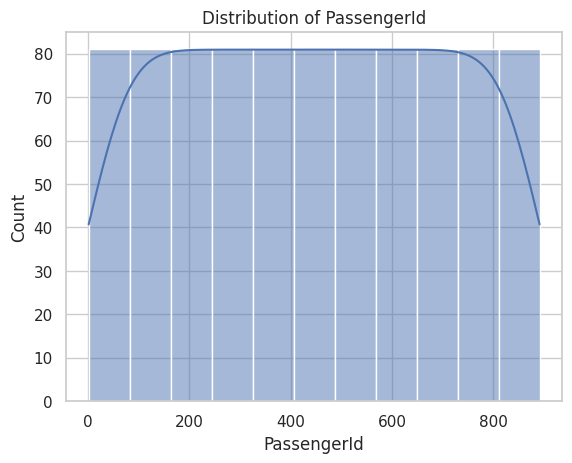

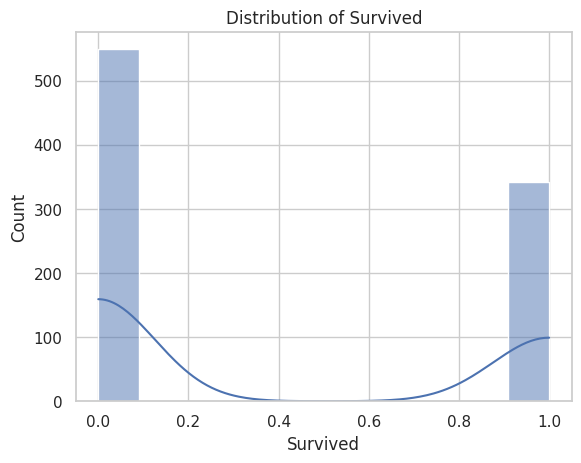

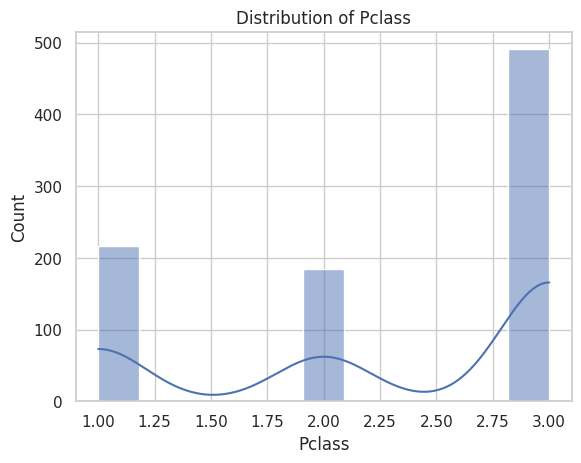

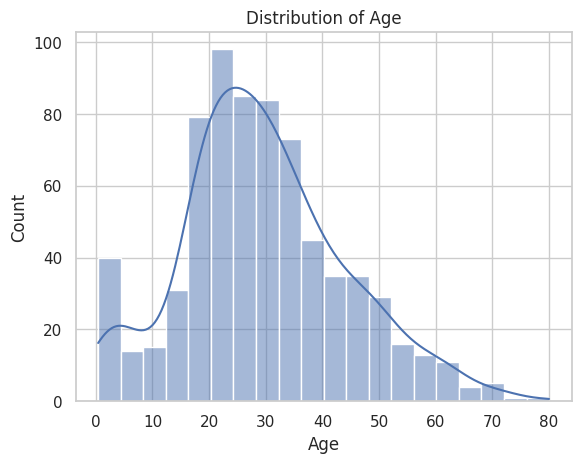

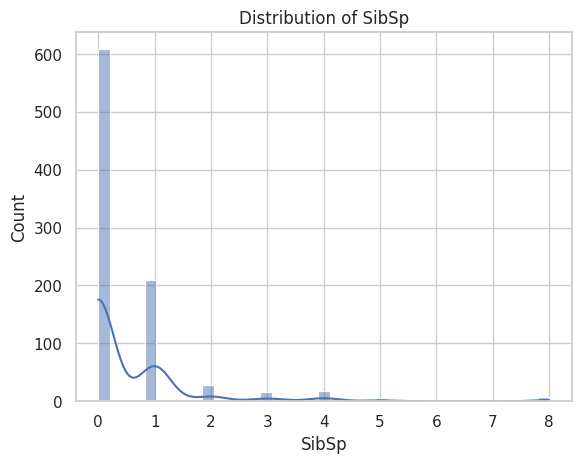

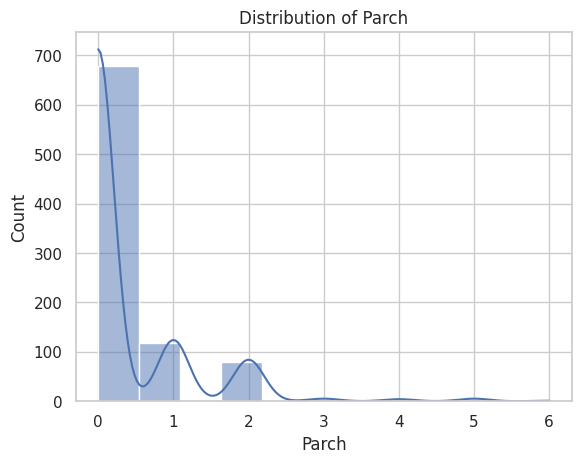

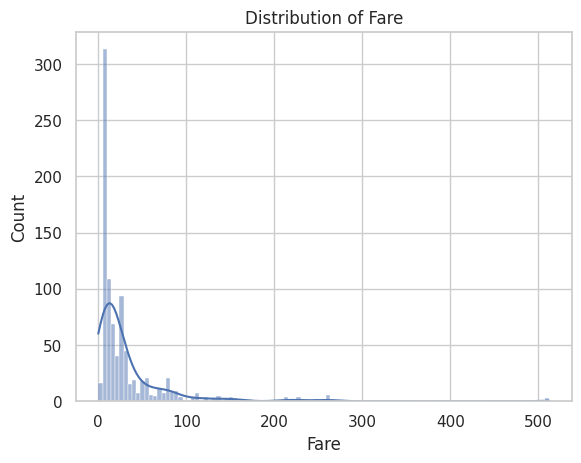

In [6]:
# Univariate analysis for numerical variables
for var in numerical_vars:
    sns.histplot(df[var].dropna(), kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

In [7]:
# Dropping unnecessary columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df.drop(columns=columns_to_drop, inplace=True)

# Display the first few rows to confirm changes
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


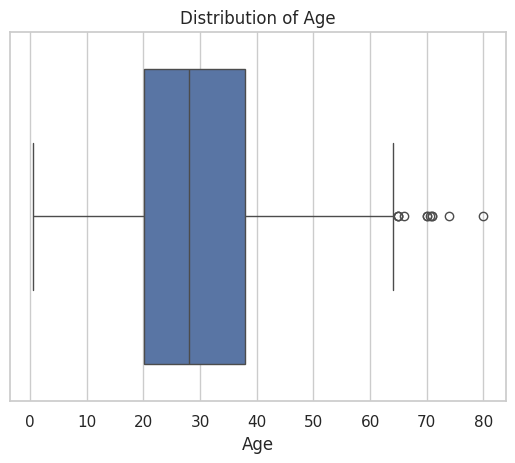

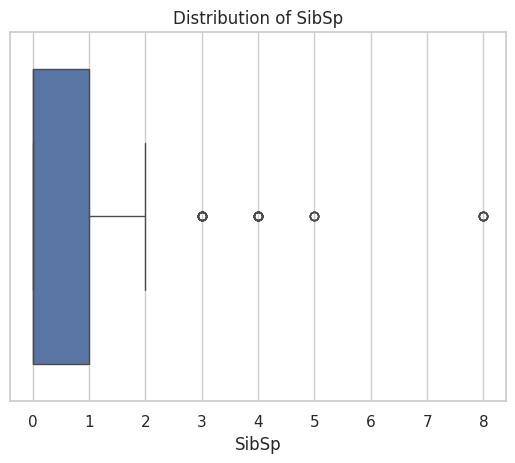

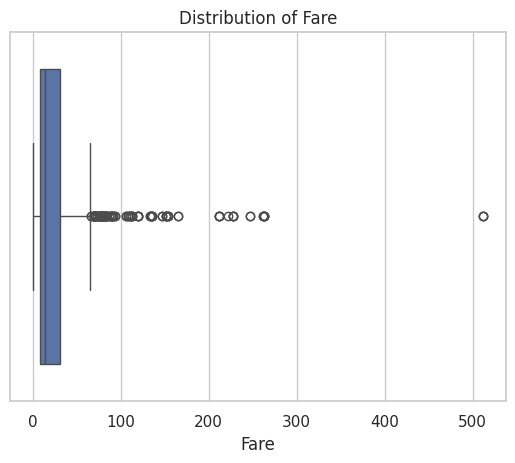

In [8]:
# Remove PassengerID from numerical_vars
numerical_vars.remove("PassengerId")

for var in ['Age', 'SibSp','Fare']:
    sns.boxplot(x=df[var].dropna())
    plt.title(f'Distribution of {var}')
    plt.show()

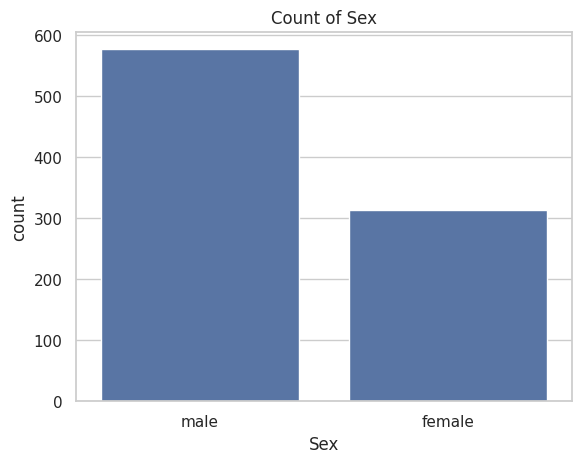

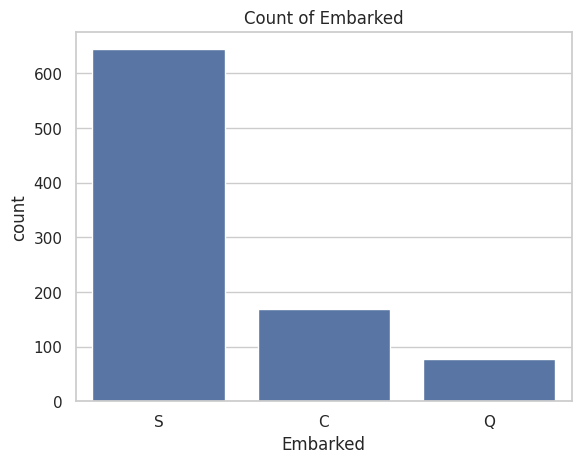

In [9]:
# Remake the categorical variable excluding the dropped ones
categorical_vars = df.select_dtypes(include=['object', 'category']).columns.tolist()

# Univariate analysis for categorical variables
for var in categorical_vars:
    sns.countplot(x=var, data=df)
    plt.title(f'Count of {var}')
    plt.show()

Relationship between Categorical Variables and Survival

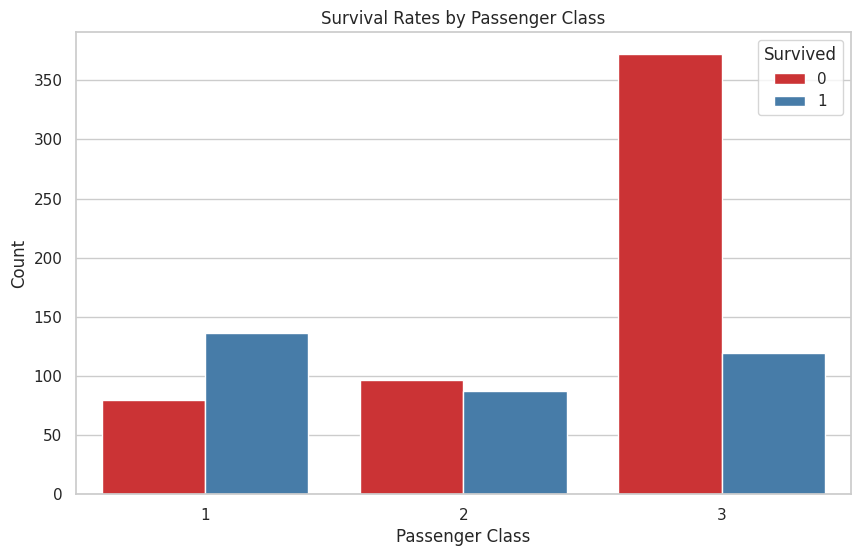

In [10]:
# Bivariate analysis: Survival Rates by Passenger Class
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Passengers in the 1st class had the highest survival rate, with more survivors than non-survivors. In contrast, passengers in the 3rd class had the lowest survival rate, with significantly more non-survivors than survivors. The 2nd class had a more balanced distribution of survivors and non-survivors.

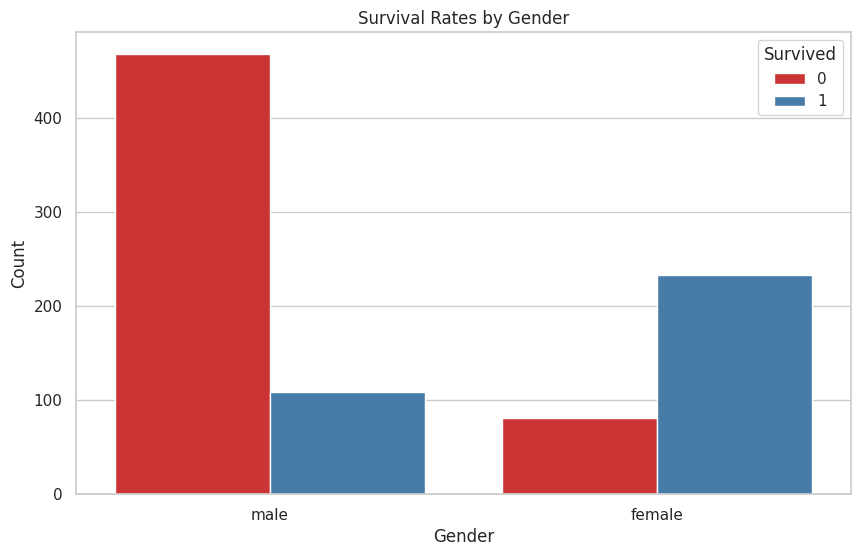

In [11]:
# Bivariate analysis: Survival Rates by Gender
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Female passengers had a significantly higher survival rate compared to male passengers, with more females surviving than not surviving. In contrast, a large majority of male passengers did not survive, indicating a strong gender disparity in survival outcomes.

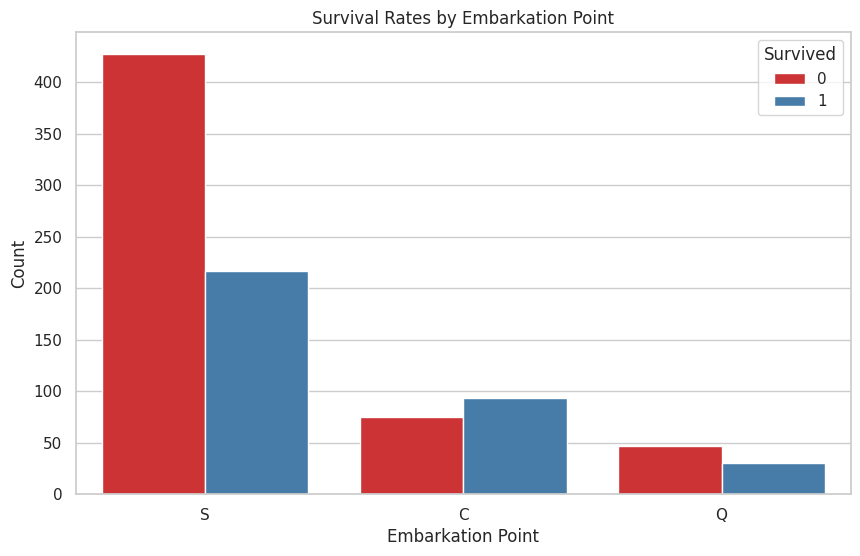

In [12]:
# Bivariate analysis: Survival Rates by Embarkation Point
plt.figure(figsize=(10, 6))
sns.countplot(x='Embarked', hue='Survived', data=df, palette='Set1')
plt.title('Survival Rates by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.legend(title='Survived', loc='upper right')
plt.show()

Passengers who embarked from Southampton (S) had the highest number of non-survivors compared to survivors. In contrast, passengers who embarked from Cherbourg (C) had a higher number of survivors than non-survivors. Queenstown (Q) had the fewest passengers, with more non-survivors than survivors. This indicates that the point of embarkation had an impact on the likelihood of survival.

Relationship between Numerical Variables and Survival

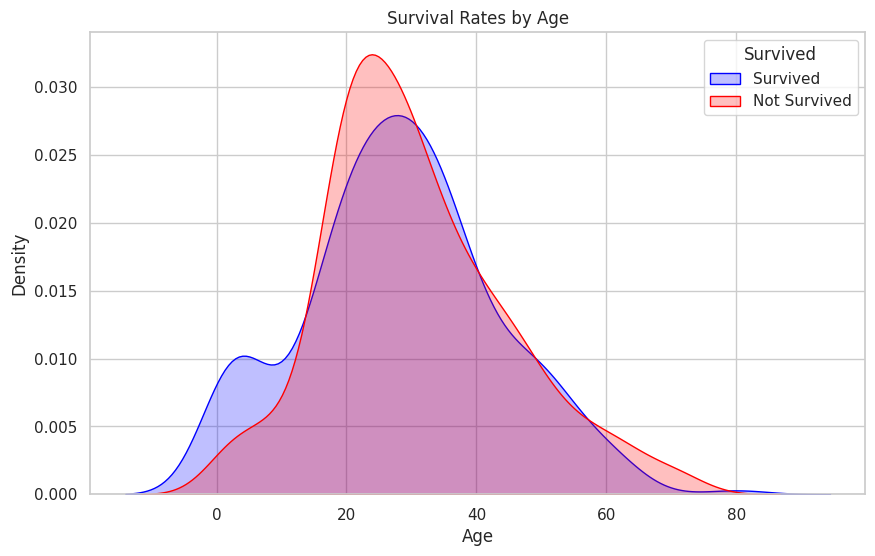

In [13]:
# Bivariate analysis: Survival Rates by Age
plt.figure(figsize=(10, 6))
sns.kdeplot(df[df['Survived'] == 1]['Age'].dropna(), fill=True, label='Survived', color='blue')
sns.kdeplot(df[df['Survived'] == 0]['Age'].dropna(), fill=True, label='Not Survived', color='red')
plt.title('Survival Rates by Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend(title='Survived')
plt.show()

This graph shows the density distribution of ages for passengers who survived and those who did not. The peak age for both survivors and non-survivors is around 20 to 30 years. However, the survival rate is higher for younger children, indicated by the blue density curve being higher than the red one at ages below 10. The density curves overlap significantly for ages 20 to 50, showing similar distributions for survivors and non-survivors within this age range. Beyond age 50, both curves taper off, indicating fewer older passengers overall.

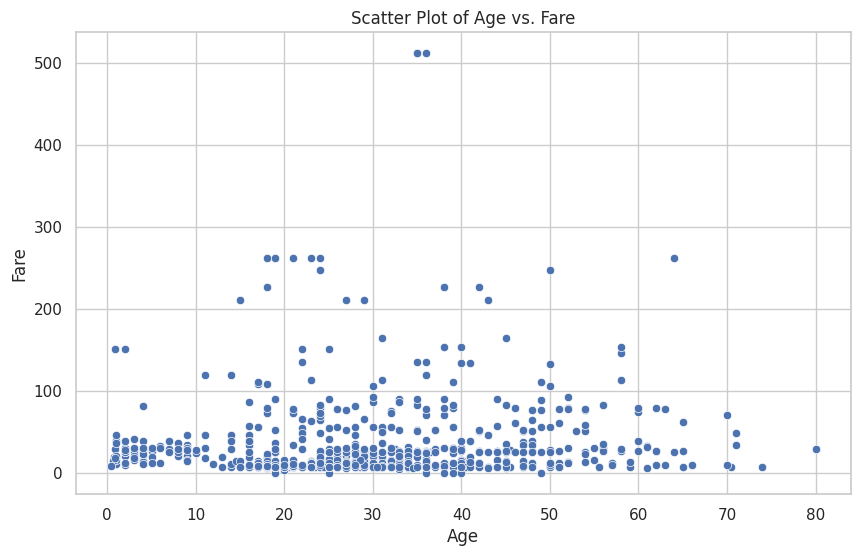

In [14]:
# Scatter plot for numerical vs numerical variables without hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Fare', data=df)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

The scatter plot depicts the relationship between passengers' ages and the fares they paid. The majority of passengers, regardless of age, paid fares below 100, with a concentration of younger passengers appearing in the lower fare range. A few outliers show significantly higher fares paid, particularly by younger individuals, with a few notable instances of fares exceeding 500.

Pairplot for visualizing relationships between numerical variables

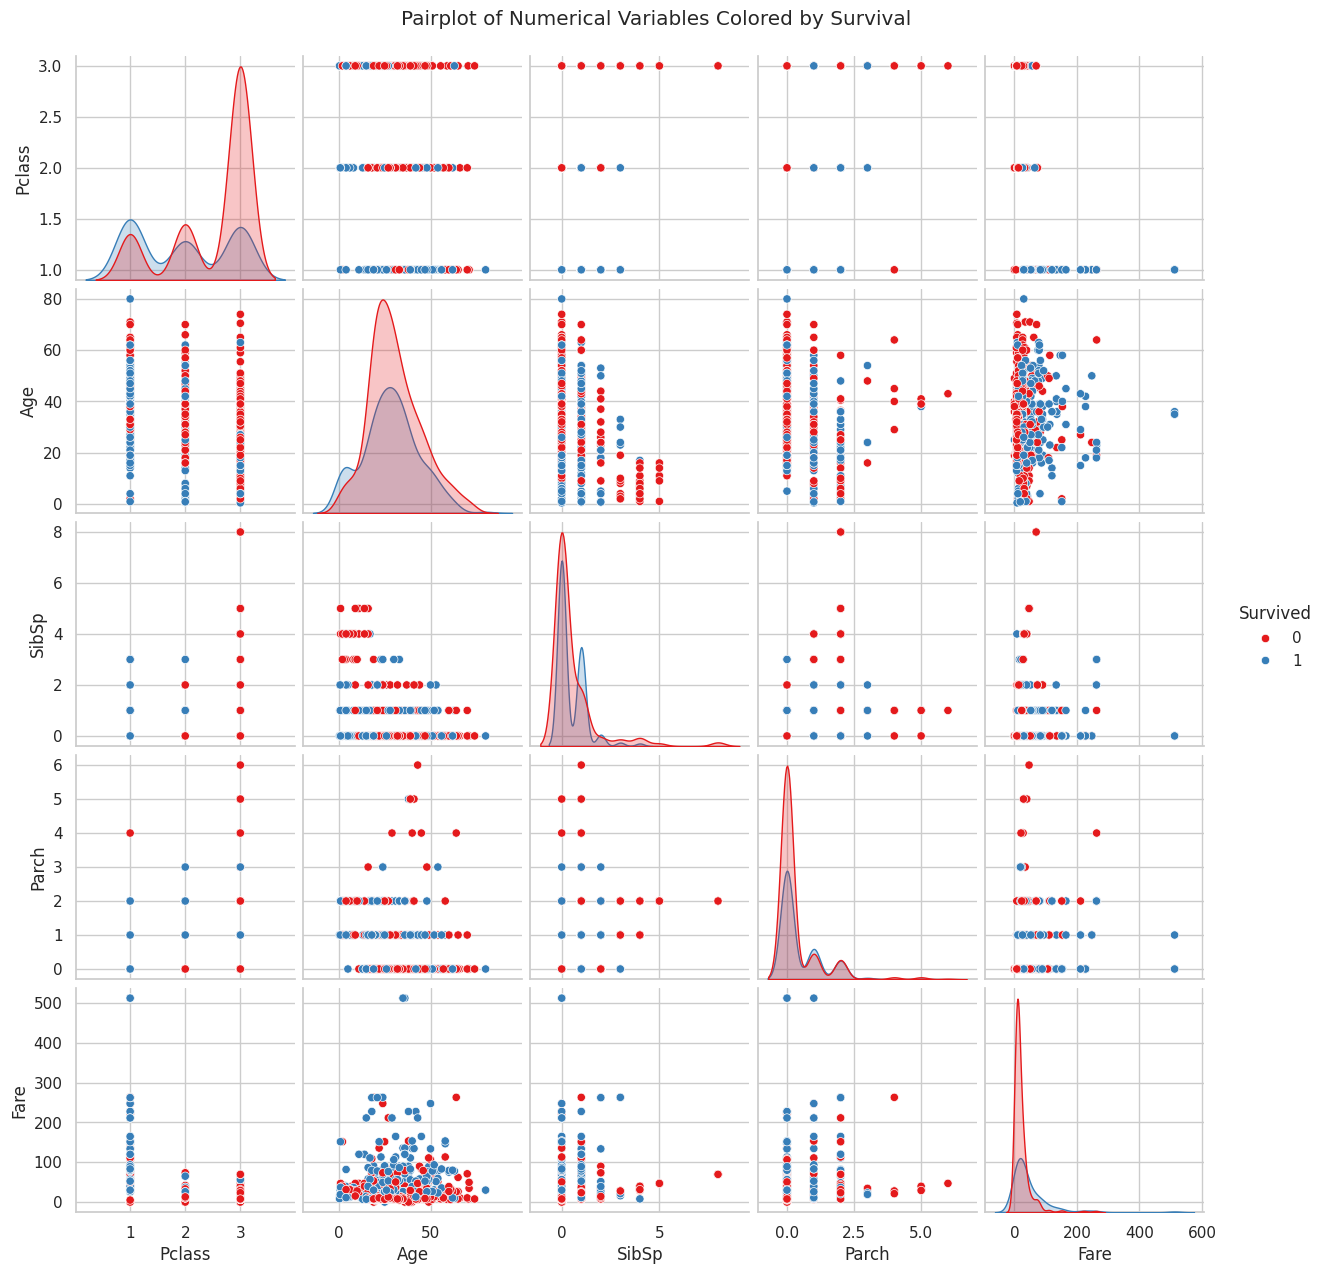

In [15]:
sns.pairplot(df, hue='Survived', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Variables Colored by Survival', y=1.02)
plt.show()

### Findings from Multivariate Pairplot

1. **Passenger Class (Pclass) vs. Other Variables**:
    - **Pclass vs. Age**: Most passengers in 1st class tend to be older compared to those in 2nd and 3rd class. There is a higher density of younger passengers in 3rd class.
    - **Pclass vs. SibSp**: Passengers in 1st class generally have fewer siblings/spouses aboard, whereas 3rd class passengers show a wider range of SibSp values.
    - **Pclass vs. Parch**: Similar to SibSp, most passengers in 1st class have fewer parents/children aboard, while 3rd class shows more variability.
    - **Pclass vs. Fare**: A clear trend shows that 1st class passengers paid higher fares, with very few 3rd class passengers paying high fares.

2. **Age vs. Other Variables**:
    - **Age vs. SibSp**: Younger passengers, especially children, are more likely to have higher SibSp values, indicating they were traveling with families. Older passengers typically have fewer siblings/spouses aboard.
    - **Age vs. Parch**: Similar to SibSp, younger passengers show higher Parch values, indicating travel with parents or children. The distribution is more spread out for younger ages.
    - **Age vs. Fare**: Higher fares are associated with a broad range of ages, particularly concentrated in younger adults.

3. **SibSp vs. Other Variables**:
    - **SibSp vs. Parch**: There is a noticeable pattern where higher SibSp values often correlate with higher Parch values, indicating large families traveling together.
    - **SibSp vs. Fare**: Passengers with 0 or 1 SibSp tend to pay a wide range of fares. Higher SibSp values show more variability but generally lower fares.

4. **Parch vs. Other Variables**:
    - **Parch vs. Fare**: Higher Parch values generally correspond to lower fares, although there are some exceptions with higher fares.

5. **Fare vs. Other Variables**:
    - **Fare vs. All Variables**: Passengers who paid higher fares (often 1st class) have better survival rates, shown by the clustering of blue points (survivors) at higher fare values.

### Survival Analysis:
- **Survival by Pclass**: Clear survival disparity, with 1st class passengers showing higher survival rates (more blue points) compared to 2nd and 3rd class.
- **Survival by Age**: Children (younger age) show higher survival rates. The survival rates among adults do not show significant disparity purely by age.
- **Survival by SibSp and Parch**: Large families show a mix of survival outcomes, but those traveling alone or with fewer family members generally have a lower survival rate.
- **Survival by Fare**: Higher fares correlate with higher survival rates, likely due to the association with passenger class.

### Interaction Insights:
- **Age and Fare with Survival**: Younger passengers who paid higher fares (1st class children) show high survival rates.
- **Family Size (SibSp and Parch) with Survival**: Large families in 3rd class have varied survival outcomes. Small families or individuals in 1st class show better survival rates.
- **Complex Interactions**: The combined effect of passenger class, family size, and fare paid indicates that wealthier individuals and smaller families had better chances of survival.

### Heatmap for showing correlation matrix of numerical variables

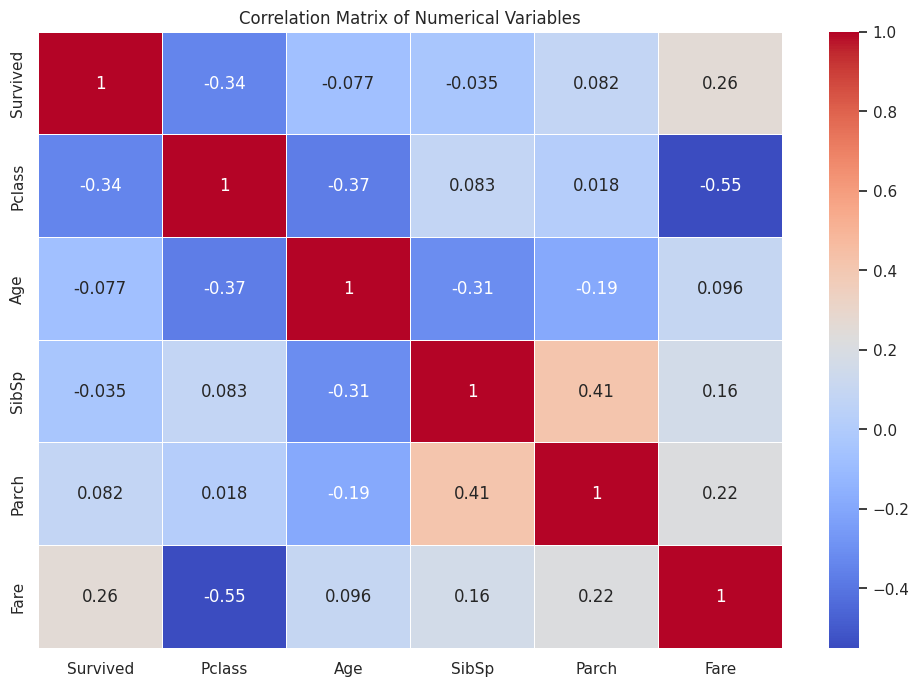

In [16]:
plt.figure(figsize=(12, 8))
numerical_df = df[numerical_vars]  # Use only numerical variables
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

There is a moderate positive correlation between `SibSp` (number of siblings/spouses) and `Parch` (number of parents/children) with a value of 0.41, indicating that larger family groups often traveled together. The correlation between `Fare` and other variables is relatively low, with the highest being 0.22 with `Parch`. Age has a slight negative correlation with `SibSp` and `Parch`, suggesting that younger passengers tended to have more family members aboard. Overall, no extremely strong correlations are present among the numerical variables.

### Multivariate Boxplots for Age and Fare across Passenger Class and Survival Status

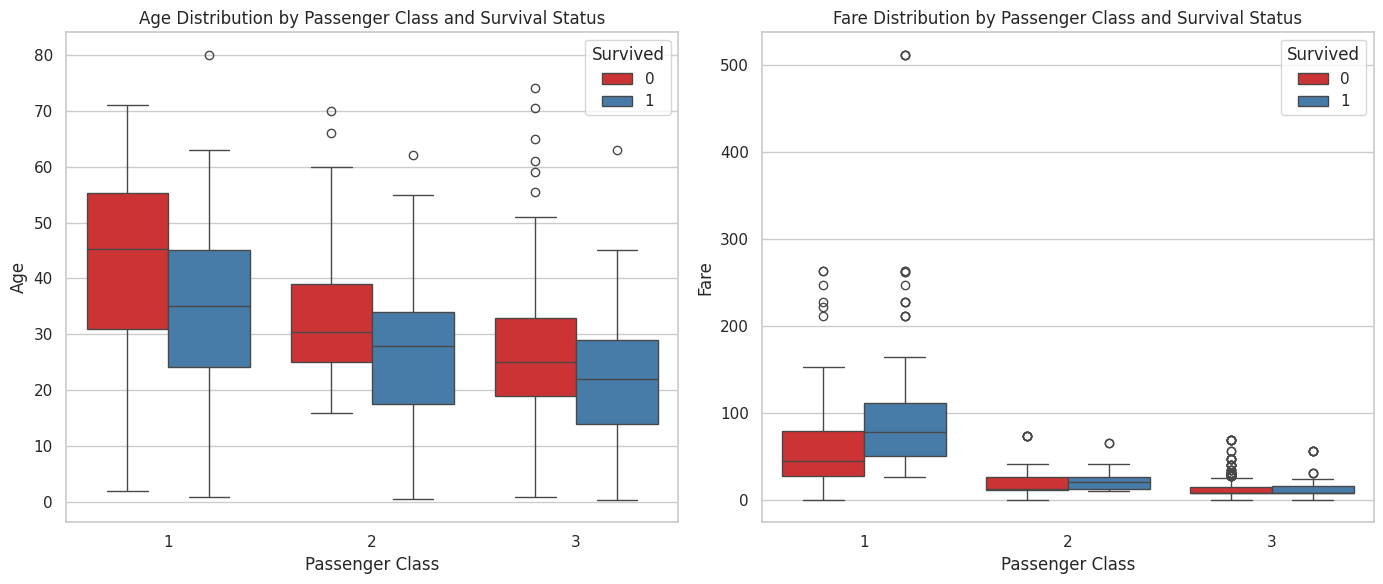

In [17]:
plt.figure(figsize=(14, 6))

# Boxplot for Age
plt.subplot(1, 2, 1)
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=df, palette='Set1')
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Age')

# Boxplot for Fare
plt.subplot(1, 2, 2)
sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, palette='Set1')
plt.title('Fare Distribution by Passenger Class and Survival Status')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')

plt.tight_layout()
plt.show()

The boxplots reveal that in 1st class, younger passengers had a higher survival rate, and those who paid higher fares were more likely to survive. In 2nd class, the fare and age distributions are more balanced between survivors and non-survivors. In 3rd class, younger passengers predominated, and the fare differences between survivors and non-survivors were minimal, indicating lower overall fares and survival rates compared to higher classes.

## Automated Exploratory Data Analysis (EDA)

Automated EDA tools can significantly speed up the process of exploring and understanding your dataset by generating comprehensive reports with minimal effort. Two popular tools for automated EDA are **Sweetviz** and **ydata-profiling**. These tools provide detailed insights, visualizations, and statistical summaries that can help you quickly grasp the main characteristics of your data.

#### Sweetviz

Sweetviz creates interactive visualizations and detailed EDA reports. It compares datasets, analyzes target values, and provides a comprehensive overview of the data.

#### ydata-profiling

ydata-profiling, formerly known as `pandas-profiling`, generates detailed reports that include descriptive statistics, correlations, missing values analysis, and more. It's a powerful tool for a quick yet thorough analysis of your dataset.

In [18]:
!pip install sweetviz
import sweetviz as sv

report = sv.analyze(source=df)
report.show_html("sweetviz_report.html")

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [19]:
!pip install ydata-profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Pandas Profiling Report")
profile.to_file("pandas_profiling_report.html")

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.0/679.0 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=bf5f4f247cffbaf9cac956df2350ce8ac132d2a6829bc37529012abcf2d7d3ca
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 8/8 [00:00<00:00, 82.98it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]